In [1]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import pickle as pk
import os

In [37]:
time = "20200518_232139"
task = "JAK3"
root = os.path.join("..", "logs", "GIN", time, task)

In [38]:
with open(os.path.join(root, "4", "classifier_metrics.pk"), "rb") as f:
    met1 = pk.load(f)
with open(os.path.join(root, "5", "classifier_metrics.pk"), "rb") as f:
    met2 = pk.load(f)

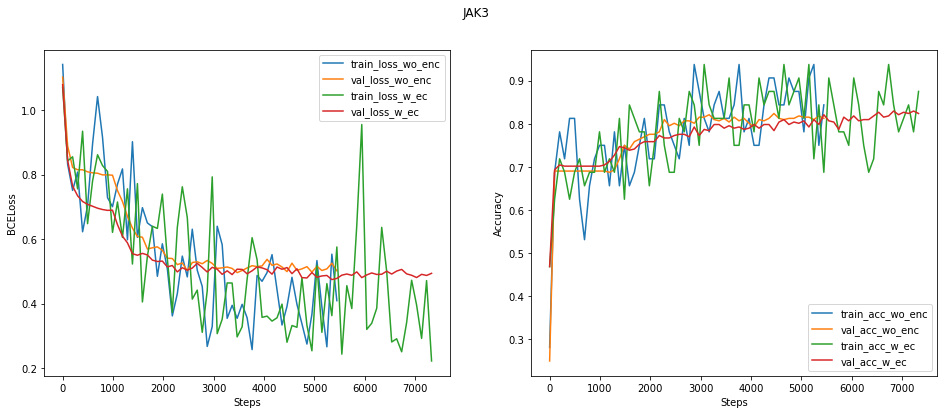

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
for i, met in enumerate([met1, met2]):
    tag = "wo_enc" if i == 0 else "w_ec"
    dif = int((len(met["training_losses"])-1) / (len(met["validating_losses"])-1))
    x1 = list(range(len(met["training_losses"])))[::dif]
    axes[0].plot(x1, met["training_losses"][::dif], label=f"train_loss_{tag}")
    x2 = list(range(len(met["training_losses"])))[::dif]
    axes[0].plot(x2, met["validating_losses"], label=f"val_loss_{tag}")
    axes[0].legend()
    axes[0].set_ylabel("BCELoss")
    axes[0].set_xlabel("Steps")
for i, met in enumerate([met1, met2]):
    tag = "wo_enc" if i == 0 else "w_ec"
    dif = int((len(met["training_accs"])-1) / (len(met["validating_accs"])-1))
    x1 = list(range(len(met["training_accs"])))[::dif]
    axes[1].plot(x1, met["training_accs"][::dif], label=f"train_acc_{tag}")
    x2 = list(range(len(met["training_losses"])))[::dif]
    axes[1].plot(x2, met["validating_accs"], label=f"val_acc_{tag}")
    axes[1].legend()
    axes[1].set_ylabel("Accuracy")
    axes[1].set_xlabel("Steps")
fig.suptitle(task)
fig.savefig(os.path.join(root, "loss_acc.png"))
plt.show()

In [50]:
plt.close("all")

In [63]:
tasks = ["ZINC1k", "JAK3", "ZINC1k_JAK3"]
indices = ["1", "5", "7"]

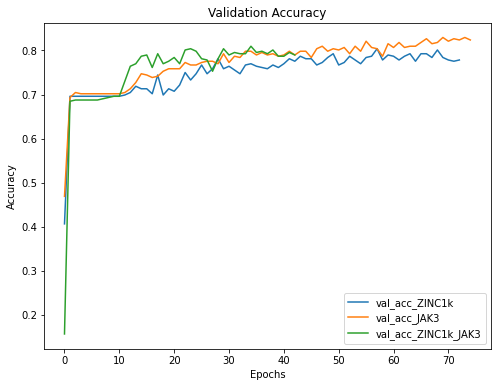

In [64]:
fig2, ax = plt.subplots(figsize=(8, 6))
for task, idx in zip(tasks, indices):
    filepath = os.path.join("..", "logs", "GIN", time, task, idx, "classifier_metrics.pk")
    with open(filepath, "rb") as f:
        met = pk.load(f)
    x = list(range(len(met["validating_accs"])))
    ax.plot(x, met["validating_accs"], label=f"val_acc_{task}")
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Validation Accuracy")
fig2.savefig(os.path.join("..", "logs", "GIN", time, "_".join(tasks)+"_val_acc.png"))

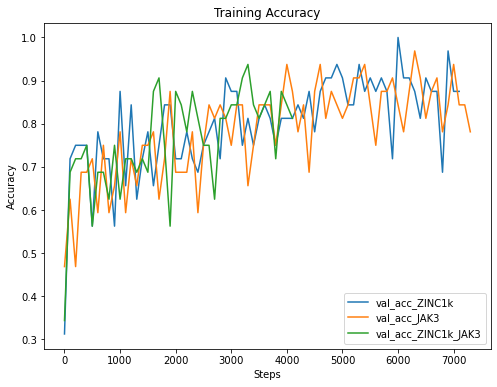

In [65]:
fig3, ax = plt.subplots(figsize=(8, 6))
for task, idx in zip(tasks, indices):
    filepath = os.path.join("..", "logs", "GIN", time, task, idx, "classifier_metrics.pk")
    with open(filepath, "rb") as f:
        met = pk.load(f)
    x = list(range(len(met["training_accs"])))[::100]
    ax.plot(x, met["training_accs"][::100], label=f"val_acc_{task}")
ax.legend()
ax.set_xlabel("Steps")
ax.set_ylabel("Accuracy")
ax.set_title("Training Accuracy")
fig3.savefig(os.path.join("..", "logs", "GIN", time, "_".join(tasks)+"_train_acc.png"))